In [1]:
import matplotlib.pyplot as plt   
import numpy as np
import pandas as pd
from libentropy_custom import calculate_smap_random, calculate_smap_theory, calculate_smap_custom, calculate_smap_custom_rep,calculate_pbar_indices
from libentropy_custom import calculate_smap_fast

import random
from libentropy_custom import calculate_entropies
from libclust import get_clust,check_volume

In [2]:
## Generate 100 configuratins for a system on 10 non-interacting spins
N_sample=100
prob=np.random.rand(10) #Each value represents the probability of a corresponding spin being in a certain state (e.g., up).
Data=np.array([(np.random.random(prob.shape)<prob) for i in range(N_sample)]) #NumPy array with Boolean elements of shape (100, 10).
df=pd.DataFrame(Data.reshape(N_sample,-1), columns=[f"spin {i}" for i in range(1,prob.size +1)], dtype=int)
#generates a list of column names: ['spin 1', 'spin 2', ..., 'spin 10']; 
#The dtype=int converts the boolean values (True and False) to integers (1 and 0, respectively)
#the pandas DataFrame ("df") is a structure that contains two-dimensional data and its corresponding labels

print(prob)
print(Data) #se confronti la "prob" e le colonne in "Data", la terza colonna avente 0.0053 in "prob" è effettivamente quasi sempre False

[0.75531919 0.76768703 0.37401964 0.49781242 0.36092295 0.71492387
 0.46477597 0.36149113 0.9132036  0.98470617]
[[False  True False  True  True False False False  True  True]
 [ True  True  True  True False  True False  True  True  True]
 [ True  True False  True  True False False False  True  True]
 [ True  True False False False False False False False  True]
 [ True  True False False  True  True  True  True  True  True]
 [False  True False  True False  True  True  True  True  True]
 [ True  True False False False  True  True  True  True  True]
 [ True  True False False False False  True  True  True  True]
 [ True False False False False False  True False  True  True]
 [ True  True False  True  True  True  True  True  True  True]
 [False  True  True False False  True  True  True  True  True]
 [ True  True  True False  True  True False False False  True]
 [ True  True  True  True  True  True False False  True  True]
 [ True False  True False False  True False False  True  True]
 [ Tr

In [3]:
df

,spin 1,spin 2,spin 3,spin 4,spin 5,spin 6,spin 7,spin 8,spin 9,spin 10
0,0,1,0,1,1,0,0,0,1,1
1,1,1,1,1,0,1,0,1,1,1
2,1,1,0,1,1,0,0,0,1,1
3,1,1,0,0,0,0,0,0,0,1
4,1,1,0,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
95,1,1,0,0,0,1,0,1,1,1
96,1,0,0,1,0,1,1,1,1,1
97,1,1,1,0,1,1,0,1,1,1
98,1,1,0,0,1,1,0,1,1,1


In [4]:
ncg=np.arange(2,11,1, dtype=int) ## number of degrees of freedom retained, here ranging from at least 2 to 10
random_mapings=calculate_smap_custom_rep(df, ncgs=ncg, nreps=20)
#Calculate state-wise mapping entropy (Smap) for custom mappings or randomly selected mappings.
#ncgs : list of the number of desired CG configurations
#nreps: Number of replicas for computing random mappings when ncgs is specified (default is 1)

#se il volume è costante, significa che non c'è nessuna colonna costituita solo da 0 o 1

print("ncg is ",ncg)

constant volume detected, V =  (array([2]), array([9]))
V =  2
ncg is  [ 2  3  4  5  6  7  8  9 10]


In [5]:
random_mapings.to_csv("cose.txt", sep='\t', index=False)
random_mapings[random_mapings.N == 2]

,N,mapping,trans_mapping,hs,hk,smap,smap_inf
0,2,"[3, 2]","[spin 4, spin 3]",1.347545,1.347545,0.125372,2.719138
9,2,"[7, 4]","[spin 8, spin 5]",1.283117,1.283117,0.122555,2.654710
18,2,"[2, 3]","[spin 3, spin 4]",1.347545,1.347545,0.125372,2.719138
27,2,"[5, 9]","[spin 6, spin 10]",0.666040,0.666040,0.123983,2.037633
44,2,"[3, 6]","[spin 4, spin 7]",1.360307,1.360307,0.125246,2.731901
53,2,"[2, 8]","[spin 3, spin 9]",0.890732,0.890732,0.126835,2.262325
62,2,"[5, 0]","[spin 6, spin 1]",0.977986,0.977986,0.116882,2.349579
71,2,"[2, 4]","[spin 3, spin 5]",1.291763,1.291763,0.122070,2.663356
80,2,"[6, 8]","[spin 7, spin 9]",0.868061,0.868061,0.120474,2.239654
89,2,"[3, 0]","[spin 4, spin 1]",1.102856,1.102856,0.123950,2.474449


In [6]:
random_mapings[random_mapings.N == 9]

,N,mapping,trans_mapping,hs,hk,smap,smap_inf
7,9,"[6, 4, 3, 9, 2, 0, 7, 1, 5]","[spin 7, spin 5, spin 4, spin 10, spin 3, spin...",4.120838,1.253777,0.009637,0.640401
16,9,"[6, 4, 7, 5, 9, 0, 2, 1, 3]","[spin 7, spin 5, spin 8, spin 6, spin 10, spin...",4.120838,1.253777,0.009637,0.640401
25,9,"[7, 0, 1, 3, 9, 8, 4, 5, 6]","[spin 8, spin 1, spin 2, spin 4, spin 10, spin...",3.901447,1.555598,0.039779,0.421010
34,9,"[3, 1, 7, 4, 2, 0, 5, 6, 9]","[spin 4, spin 2, spin 8, spin 5, spin 3, spin ...",4.120838,1.253777,0.009637,0.640401
42,9,"[1, 0, 8, 6, 5, 2, 3, 7, 9]","[spin 2, spin 1, spin 9, spin 7, spin 6, spin ...",3.929865,1.454134,0.033540,0.449428
51,9,"[9, 0, 5, 3, 2, 4, 8, 1, 6]","[spin 10, spin 1, spin 6, spin 4, spin 3, spin...",3.795103,1.564614,0.023544,0.314666
60,9,"[2, 3, 9, 6, 1, 0, 5, 8, 7]","[spin 3, spin 4, spin 10, spin 7, spin 2, spin...",3.929865,1.454134,0.033540,0.449428
69,9,"[7, 0, 9, 3, 2, 1, 6, 8, 5]","[spin 8, spin 1, spin 10, spin 4, spin 3, spin...",3.929865,1.454134,0.033540,0.449428
78,9,"[6, 4, 3, 1, 2, 7, 8, 0, 9]","[spin 7, spin 5, spin 4, spin 2, spin 3, spin ...",4.015860,1.326352,0.001699,0.535422
87,9,"[3, 1, 8, 5, 9, 4, 2, 6, 0]","[spin 4, spin 2, spin 9, spin 6, spin 10, spin...",3.795103,1.564614,0.023544,0.314666


In [7]:
len(random_mapings[random_mapings.N == 2])

17

In [8]:
np.savetxt("file_data.dat",df)
random_mapings

,N,mapping,trans_mapping,hs,hk,smap,smap_inf
0,2,"[3, 2]","[spin 4, spin 3]",1.347545,1.347545,0.125372,2.719138e+00
1,3,"[7, 8, 3]","[spin 8, spin 9, spin 4]",1.559760,1.157735,0.125033,2.238206e+00
2,4,"[2, 5, 3, 0]","[spin 3, spin 6, spin 4, spin 1]",2.261674,1.826690,0.107304,2.246972e+00
3,5,"[5, 9, 0, 3, 7]","[spin 6, spin 10, spin 1, spin 4, spin 8]",2.317330,2.052099,0.111292,1.609481e+00
4,6,"[6, 5, 4, 8, 1, 7]","[spin 7, spin 6, spin 5, spin 9, spin 2, spin 8]",3.165317,1.926842,0.067937,1.764321e+00
...,...,...,...,...,...,...,...
172,6,"[6, 4, 7, 2, 9, 5]","[spin 7, spin 5, spin 8, spin 3, spin 10, spin 6]",3.117029,2.118253,0.081363,1.716033e+00
173,7,"[6, 2, 1, 7, 5, 4, 8]","[spin 7, spin 3, spin 2, spin 8, spin 6, spin ...",3.623917,1.833378,0.029971,1.529774e+00
174,8,"[9, 6, 1, 3, 5, 7, 2, 0]","[spin 10, spin 7, spin 2, spin 4, spin 6, spin...",3.839621,1.599605,0.049102,1.052330e+00
175,9,"[5, 9, 4, 6, 7, 2, 0, 8, 3]","[spin 6, spin 10, spin 5, spin 7, spin 8, spin...",3.869360,1.579969,0.042349,3.889227e-01


In [9]:
n_at=df.shape[1]
print(n_at, " è la n_cols che dai in pasto a check-volume, che esclude l'ultima colonna\ned è anche il number of atom configurations\n")
at_mapping = np.array(range(df.shape[1]))
print(at_mapping, "è il mapping, ovvero il secondo argomento che dai a get_clust")

print("\nThe clustering is \n")
at_clust=get_clust(df,at_mapping)
at_clust["prob"]=at_clust["records"]/df.shape[0]
at_clust

10  è la n_cols che dai in pasto a check-volume, che esclude l'ultima colonna
ed è anche il number of atom configurations

[0 1 2 3 4 5 6 7 8 9] è il mapping, ovvero il secondo argomento che dai a get_clust

The clustering is 



,spin 1,spin 2,spin 3,spin 4,spin 5,spin 6,spin 7,spin 8,spin 9,spin 10,records,prob
0,0,0,0,0,0,1,1,1,1,1,1,0.01
1,0,0,0,1,0,0,0,1,1,1,1,0.01
2,0,0,0,1,0,1,1,0,1,1,1,0.01
3,0,1,0,0,1,0,1,1,1,1,1,0.01
4,0,1,0,1,0,0,0,0,1,1,2,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...
69,1,1,1,1,0,1,1,1,1,1,1,0.01
70,1,1,1,1,1,0,0,0,1,1,1,0.01
71,1,1,1,1,1,1,0,0,1,1,1,0.01
72,1,1,1,1,1,1,0,1,1,1,2,0.02


In [10]:
Data2=at_clust.iloc[:,:-2].to_numpy() #è il clustering ma svuotato delle ultime due colonne, con i records e le prob
print(type(Data2))
Data2

<class 'numpy.ndarray'>


array([[0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 1],
       [0, 1, 0, 0, 1, 0, 1, 1, 1, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1, 1, 0, 1, 1],
       [0, 1, 0, 1, 0, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 1, 0, 0, 0, 1, 1],
       [0, 1, 0, 1, 1, 1, 1, 0, 1, 1],
       [0, 1, 1, 0, 0, 1, 0, 0, 1, 1],
       [0, 1, 1, 0, 0, 1, 1, 1, 1, 1],
       [0, 1, 1, 0, 1, 0, 0, 0, 1, 1],
       [0, 1, 1, 0, 1, 0, 0, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 1],
       [1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 1, 0, 0, 1, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 1],
       [1, 0, 0, 0, 0, 1, 1, 0, 1, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1, 1, 0, 1, 0, 1],
       [1, 0, 0, 1, 0, 1, 0, 0, 1, 1],
       [1, 0, 0, 1, 0, 1, 0, 1, 1, 1],
       [1, 0, 0, 1, 0, 1,

In [11]:
with open("trajectory.xyz", "w") as f: #trasforma in binario, in modo che excogito lo capisca, il dataset
    for el in Data2:
        f.write(f"{Data2.shape[1]}\n\n")
        for el1 in el:
            f.write(f"X   {el1}\n")
np.savetxt(f"name_prob.txt", at_clust.iloc[:,-1].to_numpy(), fmt='%1.9e')

In [12]:
for i in range(2,11):
    with open("parameters_%s.txt" %i, "w") as f:
        f.write("[Parameters]\n")
        f.write(f"atomnum           = {10}\n")
        f.write(f"frames            = {len(Data2)}\n")
        f.write(f"cgnum             = {i}\n")
        f.write(f"MC_steps          = 200\n")
        f.write(f"Ncores            = 1\n")
        f.write(f"decay_time        = 800.0\n")

In [13]:
#INIZIO PARTE BONUS

pr = at_clust["records"] / df.shape[0]
V=check_volume(df, n_at)
pr

constant volume detected, V =  (array([2]), array([9]))
V =  2


0     0.01
1     0.01
2     0.01
3     0.01
4     0.02
      ... 
69    0.01
70    0.01
71    0.01
72    0.02
73    0.01
Name: records, Length: 74, dtype: float64

In [14]:
hs_at, hk_at = calculate_entropies(at_clust)
print("the resolution (Shannon) is "+str(hs_at)+" whereas the relevance is "+ str(hk_at))

the resolution (Shannon) is 4.173584433339188 whereas the relevance is 1.146706603288699


In [15]:
#Come funziona la creazione di repliche?  
#tratto da calculate_smap_custom_rep - riga 390
ncgs=ncg
nreps=20

random_sel = []
for _ in range(nreps):
    random_sel.extend([np.array(random.sample(range(n_at), r)) for r in ncgs])

sel = random_sel
print(len(sel))
sel

180


[array([3, 8]),
 array([0, 4, 9]),
 array([5, 8, 0, 6]),
 array([1, 7, 4, 2, 8]),
 array([1, 2, 7, 3, 8, 0]),
 array([5, 2, 7, 9, 3, 8, 1]),
 array([1, 2, 6, 3, 0, 7, 9, 8]),
 array([3, 0, 8, 6, 5, 7, 2, 4, 9]),
 array([0, 8, 3, 6, 2, 9, 7, 1, 4, 5]),
 array([0, 1]),
 array([4, 9, 5]),
 array([5, 4, 9, 0]),
 array([4, 6, 8, 5, 3]),
 array([4, 9, 3, 2, 6, 7]),
 array([7, 5, 6, 3, 4, 0, 8]),
 array([7, 3, 2, 0, 8, 5, 9, 6]),
 array([3, 0, 6, 8, 5, 1, 9, 2, 4]),
 array([0, 4, 5, 9, 6, 1, 3, 2, 8, 7]),
 array([5, 9]),
 array([3, 4, 0]),
 array([8, 3, 0, 7]),
 array([3, 1, 2, 6, 0]),
 array([1, 9, 7, 3, 6, 2]),
 array([5, 9, 2, 8, 6, 7, 3]),
 array([6, 5, 8, 4, 0, 7, 1, 2]),
 array([3, 2, 1, 7, 6, 8, 9, 5, 0]),
 array([6, 2, 1, 4, 5, 9, 8, 3, 0, 7]),
 array([6, 2]),
 array([4, 9, 1]),
 array([7, 8, 5, 1]),
 array([0, 7, 4, 6, 9]),
 array([1, 7, 6, 3, 5, 4]),
 array([6, 2, 4, 7, 9, 3, 1]),
 array([4, 0, 1, 5, 9, 3, 8, 6]),
 array([5, 3, 6, 9, 8, 2, 7, 1, 4]),
 array([5, 3, 7, 6, 4, 8, 0, 1, 

In [16]:
 # Initialize data structures to store information about CG mappings
cg_mappings = dict()
cg_mappings_order = []

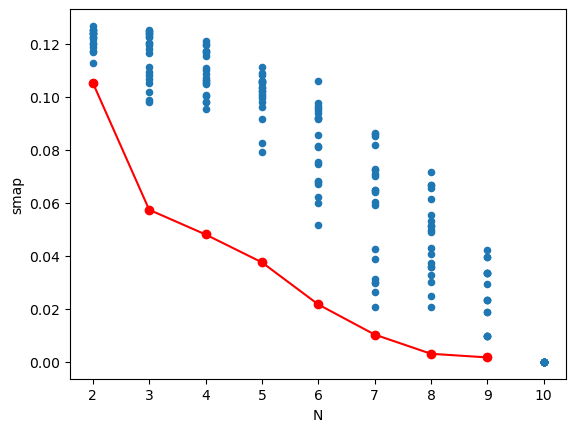

In [19]:
random_mapings.plot(x="N", y="smap", kind="scatter")

confronto=[] #dati di excogito
numeri=[i for i in range(2,10)]
with open("confronto.txt", 'r') as file:
    for line in file:
        if "lowest_smap" in line:
            # Extract the value after "lowest_smap = "
            value = float(line.split('=')[1].strip())
            confronto.append(value)

plt.plot(numeri, confronto, marker='o', linestyle='-', color='r')

In [20]:
n=3

# Generate all lists with n elements, each ranging from 0 to 9 without repetition
list_of_lists = []

import itertools

# Define the range of elements
elements = list(range(10))

# Generate all combinations of length "n"
combinations = list(itertools.combinations(elements, n))

# Convert each combination tuple to a list
list_of_lists = [list(c) for c in combinations]

smapmin=2
mapmin=[]

for mapping in list_of_lists:

# Determine the number of atom configurations
    traj=df
    
    n_at = traj.shape[1]
    ncols = n_at
    
    # Create a default atom mapping
    at_mapping = np.array(range(n_at))
    
    # Cluster atom configurations using the default mapping
    at_clust = get_clust(traj, at_mapping)
    
    # Calculate probabilities for atom configurations
    pr = at_clust["records"] / traj.shape[0]
    
    # Check the volume of the configuration space
    V = check_volume(traj, ncols)
    
    # Calculate entropies for atom configurations
    hs_at, hk_at = calculate_entropies(at_clust)
    
    # Generate random mappings if sel is None
    #mapping=[0,1]
    
    # Initialize data structures to store information about CG mappings
    cg_mappings = dict()
    cg_mappings_order = []
    
    
    ncg = len(mapping)
    key = tuple(mapping)
    
    # Cluster atom configurations using the current mapping
    cg_clust = get_clust(traj, mapping)
    
    # Calculate entropies for CG configurations
    hs, hk = calculate_entropies(cg_clust)
    
    # Calculate pbar values and use the faster method to compute Smap
    p_bar = calculate_pbar_indices(at_clust, cg_clust, traj.shape[0], mapping)
    smap = calculate_smap_fast(mapping, pr, p_bar)
    
    #print(mapping, smap)

    if smap<smapmin:
        smapmin=smap
        mapmin=mapping

print(mapmin,smapmin)

[1, 2, 4] 0.09683055510056976
